这里对dataset的数据结构进行一些查看

In [1]:
import tensorflow_datasets as tfds
import numpy as np
import torch
from torchvision import transforms
from transformers import AutoTokenizer
from transformers import AutoModelForVision2Seq, AutoProcessor, BitsAndBytesConfig
from pathlib import Path
# from prismatic.vla.action_tokenizer import ActionTokenizer
# 参数
# data_root_dir = '/home/chuangzhi/zhq/yjc/modified_libero_rlds'
# dataset_name = 'libero_spatial_no_noops'
# data_root_dir = Path("/home/chuangzhi/zhq/yjc/")  
# dataset_name = "cmu_franka_exploration_dataset_converted_externally_to_rlds"  
data_root_dir = "/home/chuangzhi/zhq/yjc/mydata_tensorflow_datasets"
dataset_name = "example_dataset"
batch_size = 1
image_aug = False
vla_path =  r"/home/chuangzhi/zhq/yjc/runs/openvla7b_huggingfacemodel+libero_spatial_no_noops+b2+lr-5e-05+lora-r32+dropout-0.0-steps20000+libero_spatial_no_noops+b2+lr-1e-05+lora-r32+dropout-0.0-steps10000+libero_spatial_no_noops+b2+lr-4e-06+lora-r32+dropout-0.0" 
# 加载数据集
# data_loader = load_oxe_dataset(data_root_dir, dataset_name, batch_size, image_aug)
dataset = tfds.load(dataset_name, data_dir=data_root_dir, split="train")



/home/chuangzhi/zhq/miniconda3/envs/openvla/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-05-18 17:04:26.788396: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-18 17:04:26.788481: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-18 17:04:26.789606: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-18 17:04:26.795084: I tensorflow/core/platform/cpu_feature_guard.cc:182] This T

In [2]:
dataset

<_PrefetchDataset element_spec={'episode_metadata': {'file_path': TensorSpec(shape=(), dtype=tf.string, name=None)}, 'steps': DatasetSpec({'action': TensorSpec(shape=(7,), dtype=tf.float32, name=None), 'discount': TensorSpec(shape=(), dtype=tf.float32, name=None), 'is_first': TensorSpec(shape=(), dtype=tf.bool, name=None), 'is_last': TensorSpec(shape=(), dtype=tf.bool, name=None), 'is_terminal': TensorSpec(shape=(), dtype=tf.bool, name=None), 'language_instruction': TensorSpec(shape=(), dtype=tf.string, name=None), 'observation': {'image': TensorSpec(shape=(240, 320, 3), dtype=tf.uint8, name=None), 'state': TensorSpec(shape=(6,), dtype=tf.float32, name=None)}, 'reward': TensorSpec(shape=(), dtype=tf.float32, name=None)}, TensorShape([]))}>

In [3]:
len(dataset)

24

In [4]:
dataset.element_spec

{'episode_metadata': {'file_path': TensorSpec(shape=(), dtype=tf.string, name=None)},
 'steps': DatasetSpec({'action': TensorSpec(shape=(7,), dtype=tf.float32, name=None), 'discount': TensorSpec(shape=(), dtype=tf.float32, name=None), 'is_first': TensorSpec(shape=(), dtype=tf.bool, name=None), 'is_last': TensorSpec(shape=(), dtype=tf.bool, name=None), 'is_terminal': TensorSpec(shape=(), dtype=tf.bool, name=None), 'language_instruction': TensorSpec(shape=(), dtype=tf.string, name=None), 'observation': {'image': TensorSpec(shape=(240, 320, 3), dtype=tf.uint8, name=None), 'state': TensorSpec(shape=(6,), dtype=tf.float32, name=None)}, 'reward': TensorSpec(shape=(), dtype=tf.float32, name=None)}, TensorShape([]))}

In [4]:
for element in dataset:
    print(element)

{'episode_metadata': {'file_path': <tf.Tensor: shape=(), dtype=string, numpy=b'/iris/u/moojink/prismatic-dev/LIBERO/libero/datasets/regenerated--no_noops/libero_spatial/pick_up_the_black_bowl_next_to_the_cookie_box_and_place_it_on_the_plate_demo.hdf5'>}, 'steps': <_VariantDataset element_spec={'action': TensorSpec(shape=(7,), dtype=tf.float32, name=None), 'discount': TensorSpec(shape=(), dtype=tf.float32, name=None), 'is_first': TensorSpec(shape=(), dtype=tf.bool, name=None), 'is_last': TensorSpec(shape=(), dtype=tf.bool, name=None), 'is_terminal': TensorSpec(shape=(), dtype=tf.bool, name=None), 'language_instruction': TensorSpec(shape=(), dtype=tf.string, name=None), 'observation': {'image': TensorSpec(shape=(256, 256, 3), dtype=tf.uint8, name=None), 'joint_state': TensorSpec(shape=(7,), dtype=tf.float32, name=None), 'state': TensorSpec(shape=(8,), dtype=tf.float32, name=None), 'wrist_image': TensorSpec(shape=(256, 256, 3), dtype=tf.uint8, name=None)}, 'reward': TensorSpec(shape=(), d

In [5]:
# total_trajectories = len(list(dataset))
# total_frames = sum(len(list(element['steps'])) for element in list(dataset))
# total_trajectories, total_frames

In [6]:

# instruction_dict = {} #key is instruction, value is total steps per instruction.

# for element in dataset:
#     for step in element['steps']:
#         language_instruction = step['language_instruction'].numpy().decode('utf-8')
#         print(language_instruction)
#         if language_instruction not in instruction_dict.keys():
#             instruction_dict[language_instruction] = 1
#         else:
#             instruction_dict[language_instruction] += 1


In [7]:
# instruction_dict #key is instruction, value is total steps per instruction.

In [6]:
instruction_dict_2= {} #key is instruction, value is num_trajectories per instruction.

for element in dataset:
    step = next(iter(element['steps']))
    language_instruction = step['language_instruction'].numpy().decode('utf-8')
    print(language_instruction)
    if language_instruction not in instruction_dict_2.keys():
        instruction_dict_2[language_instruction] = 1
    else:
        instruction_dict_2[language_instruction] += 1

pick up the black bowl next to the cookie box and place it on the plate
pick up the black bowl in the top drawer of the wooden cabinet and place it on the plate
pick up the black bowl in the top drawer of the wooden cabinet and place it on the plate
pick up the black bowl on the ramekin and place it on the plate
pick up the black bowl on the ramekin and place it on the plate
pick up the black bowl on the ramekin and place it on the plate
pick up the black bowl on the stove and place it on the plate
pick up the black bowl in the top drawer of the wooden cabinet and place it on the plate
pick up the black bowl on the stove and place it on the plate
pick up the black bowl on the stove and place it on the plate
pick up the black bowl on the ramekin and place it on the plate
pick up the black bowl between the plate and the ramekin and place it on the plate
pick up the black bowl between the plate and the ramekin and place it on the plate
pick up the black bowl next to the cookie box and pla

In [3]:
instruction_dict_2 #key is instruction, value is num_trajectories per instruction.

{'lift the knife': 75, 'open the cabinet': 75, 'lift the vegetable': 49}

In [5]:
path = dataset.element_spec['episode_metadata']
path

{'file_path': TensorSpec(shape=(), dtype=tf.string, name=None)}

In [6]:
dataset.element_spec['steps']

DatasetSpec({'action': TensorSpec(shape=(7,), dtype=tf.float32, name=None), 'discount': TensorSpec(shape=(), dtype=tf.float32, name=None), 'is_first': TensorSpec(shape=(), dtype=tf.bool, name=None), 'is_last': TensorSpec(shape=(), dtype=tf.bool, name=None), 'is_terminal': TensorSpec(shape=(), dtype=tf.bool, name=None), 'language_instruction': TensorSpec(shape=(), dtype=tf.string, name=None), 'observation': {'image': TensorSpec(shape=(240, 320, 3), dtype=tf.uint8, name=None), 'state': TensorSpec(shape=(6,), dtype=tf.float32, name=None)}, 'reward': TensorSpec(shape=(), dtype=tf.float32, name=None)}, TensorShape([]))

In [12]:
first_element = next(iter(dataset.take(1)))

In [13]:
first_element

{'episode_metadata': {'file_path': <tf.Tensor: shape=(), dtype=string, numpy=b'/iris/u/moojink/prismatic-dev/LIBERO/libero/datasets/regenerated--no_noops/libero_spatial/pick_up_the_black_bowl_next_to_the_cookie_box_and_place_it_on_the_plate_demo.hdf5'>},
 'steps': <_VariantDataset element_spec={'action': TensorSpec(shape=(7,), dtype=tf.float32, name=None), 'discount': TensorSpec(shape=(), dtype=tf.float32, name=None), 'is_first': TensorSpec(shape=(), dtype=tf.bool, name=None), 'is_last': TensorSpec(shape=(), dtype=tf.bool, name=None), 'is_terminal': TensorSpec(shape=(), dtype=tf.bool, name=None), 'language_instruction': TensorSpec(shape=(), dtype=tf.string, name=None), 'observation': {'image': TensorSpec(shape=(256, 256, 3), dtype=tf.uint8, name=None), 'joint_state': TensorSpec(shape=(7,), dtype=tf.float32, name=None), 'state': TensorSpec(shape=(8,), dtype=tf.float32, name=None), 'wrist_image': TensorSpec(shape=(256, 256, 3), dtype=tf.uint8, name=None)}, 'reward': TensorSpec(shape=(), 

In [14]:
file_path = first_element['episode_metadata']
file_path

{'file_path': <tf.Tensor: shape=(), dtype=string, numpy=b'/iris/u/moojink/prismatic-dev/LIBERO/libero/datasets/regenerated--no_noops/libero_spatial/pick_up_the_black_bowl_next_to_the_cookie_box_and_place_it_on_the_plate_demo.hdf5'>}

In [15]:

steps = first_element['steps']
steps

<_VariantDataset element_spec={'action': TensorSpec(shape=(7,), dtype=tf.float32, name=None), 'discount': TensorSpec(shape=(), dtype=tf.float32, name=None), 'is_first': TensorSpec(shape=(), dtype=tf.bool, name=None), 'is_last': TensorSpec(shape=(), dtype=tf.bool, name=None), 'is_terminal': TensorSpec(shape=(), dtype=tf.bool, name=None), 'language_instruction': TensorSpec(shape=(), dtype=tf.string, name=None), 'observation': {'image': TensorSpec(shape=(256, 256, 3), dtype=tf.uint8, name=None), 'joint_state': TensorSpec(shape=(7,), dtype=tf.float32, name=None), 'state': TensorSpec(shape=(8,), dtype=tf.float32, name=None), 'wrist_image': TensorSpec(shape=(256, 256, 3), dtype=tf.uint8, name=None)}, 'reward': TensorSpec(shape=(), dtype=tf.float32, name=None)}>

In [16]:
steps_length = steps.cardinality()
steps_length

<tf.Tensor: shape=(), dtype=int64, numpy=110>

In [17]:
first_step = next(iter(steps))
first_step.keys()

dict_keys(['action', 'discount', 'is_first', 'is_last', 'is_terminal', 'language_instruction', 'observation', 'reward'])

In [18]:
first_step['action']

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([ 0.13125   , -0.04017857, -0.        ,  0.        , -0.04928571,
       -0.        , -1.        ], dtype=float32)>

In [19]:
first_step['discount']

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [20]:
first_step['observation'].keys()

dict_keys(['image', 'joint_state', 'state', 'wrist_image'])

In [21]:
first_step['observation']['image'].shape,first_step['observation']['joint_state'].shape,first_step['observation']['state'].shape,first_step['observation']['wrist_image'].shape

(TensorShape([256, 256, 3]),
 TensorShape([7]),
 TensorShape([8]),
 TensorShape([256, 256, 3]))

In [22]:
first_step['observation']['joint_state']

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([-0.00346745, -0.15282638, -0.01792305, -2.4317706 , -0.00582676,
        2.222932  ,  0.7683609 ], dtype=float32)>

In [23]:
first_step['observation']['state']

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([-2.0487477e-01, -1.0081526e-02,  1.1746579e+00,  3.1396351e+00,
        1.4411652e-04, -8.8017955e-02,  3.8786173e-02, -3.8789734e-02],
      dtype=float32)>

In [24]:
first_step['language_instruction']

<tf.Tensor: shape=(), dtype=string, numpy=b'pick up the black bowl next to the cookie box and place it on the plate'>

In [25]:
first_step['reward']

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [35]:
first_step['observation']['image'][:8,:8,0]

<tf.Tensor: shape=(8, 8), dtype=uint8, numpy=
array([[108, 108, 109, 109, 108, 108, 108, 109],
       [108, 108, 109, 109, 108, 108, 108, 109],
       [108, 108, 109, 109, 108, 108, 108, 109],
       [108, 108, 109, 109, 109, 108, 108, 108],
       [108, 108, 109, 109, 108, 108, 108, 108],
       [107, 107, 108, 108, 108, 108, 108, 108],
       [106, 107, 108, 108, 108, 108, 108, 108],
       [106, 106, 107, 108, 108, 107, 107, 108]], dtype=uint8)>

In [36]:
first_step = next(iter(steps))

In [43]:
import tensorflow as tf
max = tf.reduce_max(first_step['observation']['image'])
min = tf.reduce_min(first_step['observation']['image'])
max,min


(<tf.Tensor: shape=(), dtype=uint8, numpy=247>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=0>)

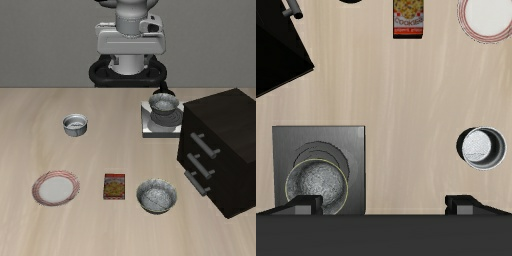

In [46]:
import tensorflow as tf
from PIL import Image
import numpy as np

# 假设 first_step['observation']['image'] 和 first_step['observation']['wrist_image'] 是 TensorFlow 张量
image = first_step['observation']['image']
wrist_image = first_step['observation']['wrist_image']

# 确保图像数据是 uint8 类型（如果数据已经是 [0, 255] 范围）
if image.dtype != tf.uint8:
    image = tf.cast(image, tf.uint8)
if wrist_image.dtype != tf.uint8:
    wrist_image = tf.cast(wrist_image, tf.uint8)

# 将 TensorFlow 张量转换为 NumPy 数组
image_np = image.numpy()
wrist_image_np = wrist_image.numpy()

# 将 NumPy 数组转换为 PIL 图像
image_pil = Image.fromarray(image_np)
wrist_image_pil = Image.fromarray(wrist_image_np)

# 创建一个新的空白图像，大小为两张图像的宽度之和
combined_image = Image.new('RGB', (image_pil.width + wrist_image_pil.width, image_pil.height))

# 将两张图像并排放置
combined_image.paste(image_pil, (0, 0))
combined_image.paste(wrist_image_pil, (image_pil.width, 0))

# 显示合并后的图像
combined_image.show()

In [26]:
# 图像预处理
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 假设目标分辨率是 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
if image_aug:
    image_transform = transforms.Compose([
        transforms.RandomResizedCrop((224, 224), scale=(0.9, 1.0), ratio=(1.0, 1.0)),
        transforms.RandomBrightness(0.2),
        transforms.RandomContrast((0.8, 1.2)),
        transforms.RandomSaturation((0.8, 1.2)),
        transforms.RandomHue(0.05),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

# Tokenizer
processor = AutoProcessor.from_pretrained(vla_path, trust_remote_code=True) # local_files_only=True
tokenizer = ActionTokenizer(processor.tokenizer)
# tokenizer = AutoTokenizer.from_pretrained("huggyllama/llama-7b")

# 处理数据
processed_data = []
for episode in dataset:
    for step in episode["steps"].as_numpy_iterator():
        image = step["observation"]["image"]
        lang = step["language_instruction"].decode().lower()
        action = step["action"]

        # 构造对话
        prompt = f"What action should the robot take to {lang}?"
        inputs = tokenizer(prompt, return_tensors="pt")
        input_ids = inputs["input_ids"].squeeze(0)
        labels = input_ids.clone()

        # 图像处理
        image = Image.fromarray(image)
        pixel_values = image_transform(image)

        # 标签处理
        labels[:-len(action) - 1] = -100  # 忽略非动作部分的损失

        processed_data.append({
            "pixel_values": pixel_values,
            "input_ids": input_ids,
            "labels": labels,
        })

# 返回 DataLoader
data_loader = DataLoader(processed_data, batch_size=batch_size, shuffle=True)
# 测试加载的数据
for batch in data_loader:
    pixel_values = batch["pixel_values"]
    input_ids = batch["input_ids"]
    labels = batch["labels"]
    print("Pixel Values Shape:", pixel_values.shape)
    print("Input IDs Shape:", input_ids.shape)
    print("Labels Shape:", labels.shape)
    break

OSError: Incorrect path_or_model_id: '/home/chuangzhi/zhq/yjc/runs/openvla7b_huggingfacemodel+libero_spatial_no_noops+b2+lr-5e-05+lora-r32+dropout-0.0-steps20000+libero_spatial_no_noops+b2+lr-1e-05+lora-r32+dropout-0.0-steps10000+libero_spatial_no_noops+b2+lr-4e-06+lora-r32+dropout-0.0'. Please provide either the path to a local folder or the repo_id of a model on the Hub.